In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import PReLU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import time

In [3]:
# Importing training/testing data files

train_df = pd.read_csv(input('What is your training data file location? '))
test_df = pd.read_csv(input('What is your testing data file location? '))

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


x_variable? Pclass
y_variable? Fare


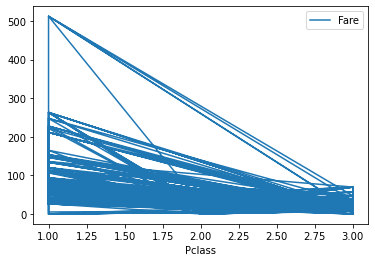

In [7]:
# Represent train data as a line graph

x_axis = input('x_variable? ')
y_axis = input('y_variable? ')
try:
    train_df.plot(x = x_axis, y = y_axis)
except:
    print('invalid input, try again plz')

In [10]:
pclass = {'1': [0, 0], '2': [0, 0], '3': [0, 0]}
sex = {'male': [0, 0], 'female': [0, 0]}
age = {'00-19': [0, 0], '20-39': [0, 0], '40-59': [0, 0], '60-99': [0, 0]}
slevel = {'0-1': [0, 0], '2-3': [0, 0], '4-9': [0, 0]}
dlevel = {'0-1': [0, 0], '2-3': [0, 0], '4-9': [0, 0]}
for i in train_df.index:
    pclass[str(train_df['Pclass'][i])][1] += 1
    sex[str(train_df['Sex'][i])][1] += 1
    try:
        tage = float(train_df['Age'][i])
        for krange in age.keys():
            if float(krange[:1]) < tage < float(krange[-2:]):
                age[krange][1] += 1
        tslevel = float(train_df['SibSp'][i])
        for krange in slevel.keys():
            if float(krange[0]) <= tslevel <= float(krange[-1]):
                slevel[krange][1] += 1
                break
        tdlevel = float(train_df['Parch'][i])
        for krange in dlevel.keys():
            if float(krange[0]) <= tdlevel <= float(krange[-1]):
                dlevel[krange][1] += 1
                break
    except:
        pass
    if int(train_df['Survived'][i]) == 1: 
        pclass[str(train_df['Pclass'][i])][0] += 1
        sex[str(train_df['Sex'][i])][0] += 1
        try:
            tage = float(train_df['Age'][i])
            for krange in age.keys():
                if float(krange[:1]) < tage < float(krange[-2:]):
                    age[krange][0] += 1
            tslevel = float(train_df['SibSp'][i])
            for krange in slevel.keys():
                if float(krange[0]) <= tslevel <= float(krange[-1]):
                    slevel[krange][0] += 1
                    break
            tdlevel = float(train_df['Parch'][i])
            for krange in dlevel.keys():
                if float(krange[0]) <= tdlevel <= float(krange[-1]):
                    dlevel[krange][0] += 1
                    break
        except:
            pass
        
print(pclass, '\n', sex, '\n', age, '\n', slevel, '\n', dlevel)

{'1': [136, 216], '2': [87, 184], '3': [119, 491]} 
 {'male': [109, 577], 'female': [233, 314]} 
 {'00-19': [70, 139], '20-39': [209, 513], '40-59': [256, 646], '60-99': [257, 667]} 
 {'0-1': [322, 817], '2-3': [17, 44], '4-9': [3, 30]} 
 {'0-1': [298, 796], '2-3': [43, 85], '4-9': [1, 10]}


Which feature would you like to analyze? pclass


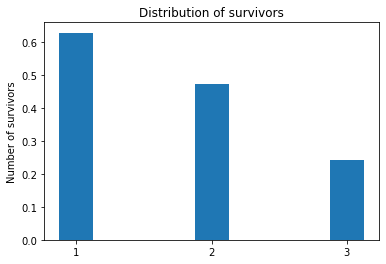

In [26]:
# Represent data as a bar graph according to wanted features

fig, ax = plt.subplots()
labels = []
survivors = []

feature = input('Which feature would you like to analyze? ')

feature = [ v for k, v in locals().items() if k == feature]

for k, v in feature[0].items():
    labels.append(k)
    survivors.append(v[0]/v[1])

ax.bar(labels, survivors, 0.25)

ax.set_ylabel('Number of survivors')
ax.set_title('Distribution of survivors')
plt.show()

In [27]:
# Preprocessing Data

labels = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

X_train = train_df[labels]
Y_train = train_df['Survived']
X_test = test_df[labels]
Y_test = test_df['PassengerId']

In [28]:
X_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
5,3,male,NaN,0,0,Q
6,1,male,54.0,0,0,S
7,3,male,2.0,3,1,S
8,3,female,27.0,0,2,S
9,2,female,14.0,1,0,C


In [29]:
Y_train.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [4]:
# Sets male -> 0
# Sets female -> 1

for i in X_train.index:
    if X_train['Sex'][i] == 'male':
        X_train['Sex'][i] = 0
    if X_train['Sex'][i] == 'female':
        X_train['Sex'][i] = 1
        
# Sets S-> 1
# Sets C -> 2
# Sets Q -> 3

for i in X_train.index:
    if X_train['Embarked'][i] == 'S':
        X_train['Embarked'][i] = 1
    if X_train['Embarked'][i] == 'C':
        X_train['Embarked'][i] = 2
    if X_train['Embarked'][i] == 'Q':
        X_train['Embarked'][i] = 3
        
# Sets Age groups 0-19 -> 0, 20-39 -> 1, 40-59 -> 2, 60+ -> 3

age = {'00-18': 0, '19-30': 1, '31-45': 2, '46-99': 3}
for i in X_train.index:
    tage = float(X_train['Age'][i])
    for k, v in age.items():
        if float(k[:1]) < tage < float(k[-2:]):
            X_train['Age'][i] = v
            break

In [5]:
# Sets male -> 0
# Sets female -> 1

for i in X_test.index:
    if X_test['Sex'][i] == 'male':
        X_test['Sex'][i] = 0
    if X_test['Sex'][i] == 'female':
        X_test['Sex'][i] = 1
        
# Sets S-> 1
# Sets C -> 2
# Sets Q -> 3

for i in X_test.index:
    if X_test['Embarked'][i] == 'S':
        X_test['Embarked'][i] = 1
    if X_test['Embarked'][i] == 'C':
        X_test['Embarked'][i] = 2
    if X_test['Embarked'][i] == 'Q':
        X_test['Embarked'][i] = 3
        
# Sets Age groups 0-19 -> 0, 20-39 -> 1, 40-59 -> 2, 60+ -> 3

age = {'00-18': 0, '19-30': 1, '31-45': 2, '46-99': 3}
for i in X_test.index:
    tage = float(X_test['Age'][i])
    for k, v in age.items():
        if float(k[:1]) < tage < float(k[-2:]):
            X_test['Age'][i] = v
            break

In [6]:
X_train['Age'] = X_train['Age'].fillna(value = X_train['Age'].mean())
X_train['Embarked'] = X_train['Embarked'].fillna(value = X_train['Embarked'].mean())

In [7]:
X_test['Age'] = X_test['Age'].fillna(value = X_test['Age'].mean())
X_test['Embarked'] = X_test['Embarked'].fillna(value = X_test['Embarked'].mean())

In [34]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,1.464986,0.523008,0.381594,1.362205
std,0.836071,0.843764,1.102743,0.806057,0.635442
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,1.000000
50%,3.000000,1.464986,0.000000,0.000000,1.000000
75%,3.000000,2.000000,1.000000,0.000000,2.000000
max,3.000000,3.000000,8.000000,6.000000,3.000000


In [36]:
print(X_train.shape, '\n', Y_train.shape, '\n', X_test.shape, '\n', Y_test.shape)

(891, 6) 
 (891,) 
 (418, 6) 
 (418,)


In [39]:
model = Sequential()

model.add(Dense(16, input_dim = X_train.shape[1]))
model.add(PReLU())
model.add(Dense(16, activation = PReLU()))
model.add(PReLU())
model.add(Dense(1, activation = 'sigmoid'))
          
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                112       
_________________________________________________________________
p_re_lu_3 (PReLU)            (None, 16)                16        
_________________________________________________________________
dense_8 (Dense)              (None, 16)                288       
_________________________________________________________________
p_re_lu_5 (PReLU)            (None, 16)                16        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
model.fit(X_train, Y_train, epochs = 35, batch_size = 32, validation_split = 0.2)


Train on 712 samples, validate on 179 samples
Epoch 1/35
712/712 [==============================] - 1s 781us/step - loss: 0.7772 - val_loss: 0.7191
Epoch 2/35
712/712 [==============================] - 0s 78us/step - loss: 0.6698 - val_loss: 0.6375
Epoch 3/35
712/712 [==============================] - 0s 73us/step - loss: 0.6166 - val_loss: 0.5868
Epoch 4/35
712/712 [==============================] - 0s 66us/step - loss: 0.5833 - val_loss: 0.5474
Epoch 5/35
712/712 [==============================] - 0s 64us/step - loss: 0.5565 - val_loss: 0.5176
Epoch 6/35
712/712 [==============================] - 0s 75us/step - loss: 0.5364 - val_loss: 0.4957
Epoch 7/35
712/712 [==============================] - 0s 70us/step - loss: 0.5193 - val_loss: 0.4730
Epoch 8/35
712/712 [==============================] - 0s 72us/step - loss: 0.5066 - val_loss: 0.4594
Epoch 9/35
712/712 [==============================] - 0s 70us/step - loss: 0.4960 - val_loss: 0.4446
Epoch 10/35
712/712 [======================

In [41]:
Predictions = model.predict(X_test)

In [42]:
df = pd.DataFrame(Predictions, columns = ['Survival'])

In [43]:
df['PassengerId'] = Y_test

In [49]:
df

,Survival,PassengerId
0,0.0,892
1,1.0,893
2,0.0,894
3,0.0,895
4,0.0,896
...,...,...
413,0.0,1305
414,1.0,1306
415,0.0,1307
416,0.0,1308


In [8]:
for i in df.index:
    Prediction = df.loc[:, 'Survival'].iloc[i]
    if float(Prediction) >= 0.5:
        df.loc[:, 'Survival'].iloc[i] = 1
    if float(Prediction) < 0.5:
        df.loc[:, 'Survival'].iloc[i] = 0

In [53]:
df.head(10)

,Survival,PassengerId
0,0.0,892
1,1.0,893
2,0.0,894
3,0.0,895
4,0.0,896
5,0.0,897
6,1.0,898
7,0.0,899
8,1.0,900
9,0.0,901


In [54]:
df.to_csv(r'Titanic_Predictions.csv', index = False, columns = ['Survival', 'PassengerId'])